# Scale-Free Networks

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [144]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')

In [145]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from utils import decorate, savefig

# Set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

In [146]:
# make a directory for figures
!mkdir -p figs

## Facebook data

The following function reads a file with one edge per line, specified by two integer node IDs.
NumPy 提供了函数loadtext，它读取给定的文件，并以 NumPy 数组的形式返回内容。参数dtype指定数组元素的类型

In [147]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

We'll read the Facecook data downloaded from [SNAP](https://snap.stanford.edu/data/egonets-Facebook.html)
数据文件为每条边包含一行，用户由 0 到 4038 之间的整数标识。下面是读取文件的代码：



In [148]:
download('https://snap.stanford.edu/data/facebook_combined.txt.gz')

In [149]:
fb = read_graph('facebook_combined.txt.gz')
n = len(fb)
m = len(fb.edges())
n, m

(4039, 88234)

With larger graphs, it takes too long to compute clustering coefficients and path lengths, but we can estimate them by sampling.  NetworkX provides a function in its approximation module that estimates the clustering coefficient:
现在我们可以检查这个数据集是否具有小世界图的特征：高群聚性和短路径长度。
NetworkX 提供了一个叫做的函数average_clustering，它可以更快地完成相同的工作。

但是对于更大的图，它们都太慢，需要与nk^2成正比的时间，其中n是节点数，k是每个节点的邻居数。

幸运的是，NetworkX提供了一个通过随机抽样来估计群聚系数的函数。你可以像这样调用它：


In [150]:
from networkx.algorithms.approximation import average_clustering

And I've written a function that estimates the average path length.
sample_path_lengths(G, nodes=None(随机抽), trials=1000 1000组实验 ):
读取图
选择随机的节点对并计算它们之间的路径长度。
循环返回长度列表


In [151]:
def sample_path_lengths(G, nodes=None, trials=1000):
    """Choose random pairs of nodes and compute the path length between them.

    G: Graph
    nodes: list of nodes to choose from
    trials: number of pairs to choose

    returns: list of path lengths
    选择随机的节点对并计算它们之间的路径长度。

    G：图表
    节点：可供选择的节点列表
    试验：可供选择的配对数

    返回：路径长度列表
    """
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)
        
    pairs = np.random.choice(nodes, (trials, 2))
    lengths = [nx.shortest_path_length(G, *pair) 
               for pair in pairs]
    return lengths

计算fb的长度
计算出的的应该是一个list 期中包括了1000例任意两点之间的距离

In [152]:
sample_path_lengths(fb, nodes=None, trials=1000)

[4,
 2,
 2,
 5,
 3,
 5,
 5,
 4,
 4,
 3,
 3,
 4,
 2,
 6,
 5,
 3,
 3,
 4,
 4,
 3,
 2,
 5,
 4,
 5,
 4,
 2,
 4,
 3,
 3,
 3,
 4,
 6,
 5,
 3,
 3,
 3,
 3,
 4,
 4,
 2,
 4,
 6,
 5,
 4,
 4,
 3,
 4,
 5,
 4,
 7,
 4,
 3,
 5,
 4,
 7,
 3,
 4,
 5,
 5,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 2,
 4,
 4,
 2,
 6,
 3,
 2,
 4,
 4,
 3,
 3,
 4,
 2,
 2,
 3,
 4,
 4,
 4,
 5,
 3,
 3,
 4,
 3,
 7,
 4,
 5,
 4,
 2,
 4,
 4,
 4,
 5,
 2,
 4,
 2,
 3,
 3,
 4,
 4,
 3,
 2,
 3,
 4,
 3,
 4,
 4,
 4,
 5,
 4,
 2,
 5,
 4,
 3,
 4,
 2,
 3,
 5,
 2,
 7,
 2,
 3,
 4,
 5,
 3,
 4,
 3,
 5,
 5,
 4,
 4,
 6,
 3,
 3,
 4,
 3,
 2,
 2,
 3,
 2,
 4,
 5,
 4,
 4,
 4,
 2,
 5,
 3,
 3,
 4,
 5,
 2,
 4,
 4,
 4,
 5,
 7,
 2,
 4,
 6,
 3,
 4,
 4,
 4,
 4,
 2,
 5,
 2,
 3,
 4,
 3,
 5,
 4,
 5,
 6,
 3,
 2,
 5,
 3,
 4,
 2,
 2,
 4,
 2,
 2,
 2,
 3,
 4,
 4,
 5,
 5,
 3,
 4,
 7,
 3,
 4,
 4,
 1,
 6,
 4,
 2,
 5,
 5,
 3,
 5,
 3,
 4,
 5,
 4,
 3,
 4,
 4,
 5,
 3,
 6,
 3,
 2,
 2,
 2,
 4,
 3,
 4,
 3,
 4,
 4,
 5,
 3,
 3,
 2,
 4,
 4,
 5,
 4,
 3,
 7,
 4,
 4,
 4,
 2,
 4,
 4,
 4,


计算长度

In [153]:
def estimate_path_length(G, nodes=None, trials=1000):
    return np.mean(sample_path_lengths(G, nodes, trials))

The average clustering coefficient is high.

In [154]:
C = average_clustering(fb)
C

0.603

The average path length is low.

In [155]:
L = estimate_path_length(fb)
L

3.731

## WS Graph

Next I'll construct a WS graph with the same number of nodes and average degree as the Facebook network:
在 Facebook 数据集中，每个节点的平均边数约为 22。由于每条边都连接到两个节点，度的均值是每个节点边数的两倍：

In [156]:
n = len(fb)
m = len(fb.edges())
k = int(round(2*m/n))
k

44

With `p=0` we get a ring lattice.

The number of edges is a little bigger than in the dataset because we have to round `k` to an integer.

In [157]:
lattice = nx.watts_strogatz_graph(n, k, p=0)
len(lattice), len(lattice.edges())

(4039, 88858)

len(lattice)代表节点数，len(lattice.edges())代表总边数
The clustering coefficient is a little higher than in the dataset.
C，L分别代表Facebook network的 聚集度和平均路径长度

In [158]:
C, average_clustering(lattice)

(0.603, 0.727)

And the path length is much higher.

In [159]:
L, estimate_path_length(lattice)

(3.731, 46.096)

With `p=1` we get a random graph.

In [160]:
random_graph = nx.watts_strogatz_graph(n, k, p=1)
estimate_path_length(random_graph), average_clustering(random_graph)

(2.576, 0.012)

在随机图中，L是 2.6，甚至比数据集（3.7）短，但C只有 0.011，所以这是不好的。

The clustering coefficient is small.


In [161]:
C, average_clustering(random_graph)

(0.603, 0.009)

And the path lengths are very small.

In [162]:
L, estimate_path_length(random_graph)

(3.731, 2.611)

By trial and error, I found that `p=0.05` yields a graph with about the right values for `C` and `L`.

In [163]:
ws = nx.watts_strogatz_graph(n, k, 0.05, seed=15)

The clustering coefficient is a little higher than in the data.
通过反复试验，我们发现，当p=0.05时，我们得到一个高群聚和短路径长度的 WS

In [164]:
C, average_clustering(ws)

(0.603, 0.649)

And the path length is a little lower.
在这个图中C是0.63，比数据集高一点，L是 3.2，比数据集低一点。所以这个图很好地模拟了数据集的小世界特征。

In [165]:
L, estimate_path_length(ws)

(3.731, 3.234)

So that seems good so far.
群聚系数约为0.61，这是较高的，正如我们所期望的那样，如果这个网络具有小世界特性。

平均路径为3.7，在 4000 多个用户的网络中相当短。毕竟这是一个小世界。



## Degree 度

But let's look at the degree distribution.

The following function returns a list of degrees, one for each node:

但是让我们看看度数分布。
以下函数返回度数列表，每个节点一个度数：
节点的度是它连接到的邻居的数量。


In [166]:
def degrees(G):
    """List of degrees for nodes in `G`.
    
    G: Graph object
    
    returns: list of int
    """
    return [G.degree(u) for u in G]

The average degree in the WS model is about right.
WS 模型中的平均度数大约是正确的。
如果 WS 图是 Facebook 网络的一个很好的模型，它应该具有相同的总（或平均）度，理想情况下不同节点的度数相同。
数据集中的度的均值是 43.7；WS 模型中的度的均值是 44。到目前为止还不错。

In [167]:
np.mean(degrees(fb)), np.mean(degrees(ws))

(43.69101262688784, 44.0)

但是，WS 模型中的度的标准差为 1.5；数据中的标准差是 52.4。有点糟。
But the standard deviation isn't even close:
但标准偏差甚至不接近：

In [168]:
np.std(degrees(fb)), np.std(degrees(ws))

(52.41411556737521, 1.4309215628189869)

To see what's going on, we need to look at the whole distribution.

为了更好地查看，我们必须看看度的 分布，而不仅仅是均值和标准差。
I'll start with a very small graph:
Pmf 对象来表示度的分布, Pmf 代表“概率质量函数”；
Pmf 是值到概率的映射。Pmf 是每个可能的度d，到度为d的节点比例的映射。



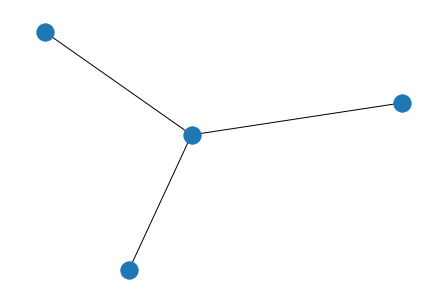

In [169]:
G = nx.Graph()
G.add_edge(1, 0)
G.add_edge(2, 0)
G.add_edge(3, 0)
nx.draw(G)

Here's what the list of degrees looks like for this graph:
节点0度为 3，其它度为 1。

In [170]:
degrees(G)


[1, 3, 1, 1]

To compute the degree distribution, I'll use the `Pmf` class from `empiricaldist`

In [171]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

A `Pmf` object maps from each degree to the fraction of nodes with that degree.
一个“Pmf”对象从每个度数映射到具有该度数的节点的分数。

In [172]:
from empiricaldist import Pmf

pmf = Pmf.from_seq(degrees(G))
pmf

,probs
1,0.75
3,0.25


75% of the nodes have degree 1; 25% have degree 3.
在这个例子中，75％的节点度为 1，25％度为 3。

We can visualize the distribution as a histogram:

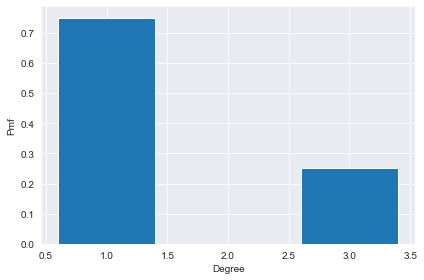

In [173]:
pmf.bar()
decorate(xlabel='Degree',
         ylabel='Pmf')

And we can use the `Pmf` to compute mean and standard deviation:

In [174]:
pmf_fb = Pmf.from_seq(degrees(fb))
pmf_fb.mean(), pmf_fb.std()

(43.69101262688785, 52.41411556737521)

In [175]:
pmf_ws = Pmf.from_seq(degrees(ws))
pmf_ws.mean(), pmf_ws.std()

(44.00000000000001, 1.4309215628189869)

We can also use the `Pmf` to look up the fraction of nodes with exactly 1 neighbor.
我们还可以使用“Pmf”来查找恰好有 1 个邻居的节点的比例。

In [225]:
pmf_fb(1), pmf_ws(1)

(0.018568952711067097, 0)

Here's what the degree distributions look like for the Facebook data and the WS model.  They don't resemble each other at all.

Saving figure to file figs/chap04-1


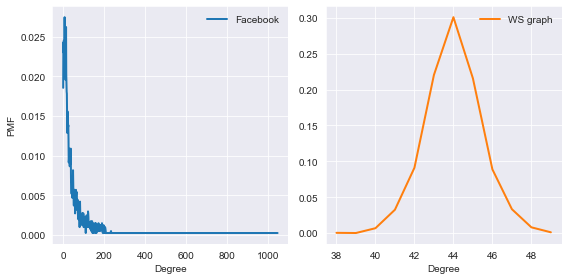

In [177]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
pmf_fb.plot(label='Facebook', color='C0')
decorate(xlabel='Degree', ylabel='PMF')

plt.subplot(1,2,2)
pmf_ws.plot(label='WS graph', color='C1')
decorate(xlabel='Degree')

savefig('figs/chap04-1')

Facebook 数据集和 WS 模型中的度的 PMF
We can get a better view of the Facebook data by plotting the PMF on a log-log scale.

The result suggests that the degree distribution follows a power law, at least for values larger than 10 or so.

The log-log scale doesn't help the WS graph.
我们可以通过在对数尺度上绘制 PMF 来更好地查看 Facebook 数据。

结果表明度数分布遵循幂律，至少对于大于 10 左右的值。

对数比例对 WS 图没有帮助。
在 WS 模型中，大多数用户有大约 44 个朋友；最小值是 38，最大值是 50。这个变化不大。在数据集中，有很多用户只有 1 或 2 个朋友，但有一个人有 1000 多个！

# 像这样的分布，有许多小的值和一些非常大的值，被称为重尾。

# 4.4  Heavy-tailed distributions 重尾分布
在复杂性科学的许多领域中，重尾分布是一个常见特征，它们将成为本书的一个反复出现的主题。

我们可以在双对数轴绘制它，来获得重尾分布的更清晰的图像，就像上面那副图那样。这种转换突显了分布的尾巴；也就是较大值的概率。

在这种转换下，数据大致在一条直线上，这表明分布的最大值与概率之间存在“幂律”关系。在数学上，

Saving figure to file figs/chap04-2


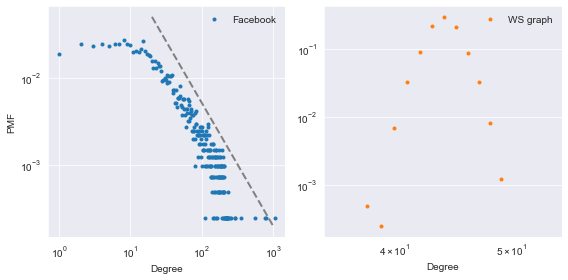

In [178]:
plt.figure(figsize=(8,4))
options = dict(ls='', marker='.')

plt.subplot(1,2,1)
plt.plot([20, 1000], [5e-2, 2e-4], color='gray', linestyle='dashed')

pmf_fb.plot(label='Facebook', color='C0', **options)
decorate(xscale='log', yscale='log',
         xlabel='Degree', ylabel='PMF')

plt.subplot(1,2,2)
pmf_ws.plot(label='WS graph', color='C1', **options)
decorate(xlim=[35, 55], 
         xscale='log', yscale='log',
         xlabel='Degree')

savefig('figs/chap04-2')

The discrepancy between the actual degree distribution and the WS model is the motivation for the BA model.
实际度数分布与 WS 模型之间的差异是 我们构建BA 模型的动机。
因此，如果一个分布遵循幂律，并且我们在双对数刻度上绘制PMF(k)与k的关系，那么我们预计至少对于k的较大值，将有一条斜率为-α的直线。

所有的幂律分布都是重尾的，但是还有其他重尾分布不符合幂律。我们将很快看到更多的例子。

但首先，我们有一个问题：WS 模型拥有高群聚性和短路径长度，我们在数据中也看到了，但度的分布根本不像数据。这种差异就启发了我们下一个主题，Barabási-Albert 模型。

## BA model

Here's a simplified version of [the NetworkX function that generates BA graphs](https://github.com/networkx/networkx/blob/master/networkx/generators/random_graphs.py).
1999 年，Barabási 和 Albert 发表了一篇论文“Emergence of Scaling in Random Networks”描述了几个现实世界的网络的结构特征，包含一些图，它们展示了电影演员，万维网（WWW）页面和美国西部电网设施的互联性。
他们测量每个节点的度并计算PMF(k)，即节点度为k的比例。然后他们在双对数标度上绘制PMF(k)与k的关系。这些曲线可用一条直线拟合，至少对于k的较大数值；所以他们得出结论，这些分布是重尾的。
### Growth
BA 模型不是从固定数量的顶点开始，而是从一个较小图开始，每次添加一个顶点。
### Preferential attachment:
当创建一个新的边时，它更可能连接到一个已经有很多边的节点。这种“富者更富”的效应是一些现实世界网络增长模式的特征。
最后，他们表明，由 Barabási-Albert（BA）模型模型生成的图，度的分布遵循幂律。

NetworkX 提供了一个生成 BA 图的函数。我们将首先使用它；然后我会告诉你它的工作原理。


In [179]:
# modified version of the NetworkX implementation from
# https://github.com/networkx/networkx/blob/master/networkx/generators/random_graphs.py

import random

def barabasi_albert_graph(n, k, seed=None):
    """Constructs a BA graph.
    
    n: number of nodes
    k: number of edges for each new node
    seed: random seen
    """
    if seed is not None:
        random.seed(seed)
    
    G = nx.empty_graph(k)
    targets = set(range(k))
    repeated_nodes = []

    for source in range(k, n):

        G.add_edges_from(zip([source]*k, targets))

        repeated_nodes.extend(targets)
        repeated_nodes.extend([source] * k)

        targets = _random_subset(repeated_nodes, k)

    return G

And here's the function that generates a random subset without repetition.

In [180]:
def _random_subset(repeated_nodes, k):
    """Select a random subset of nodes without repeating.
    
    repeated_nodes: list of nodes
    k: size of set
    
    returns: set of nodes
    """
    targets = set()
    while len(targets) < k:
        x = random.choice(repeated_nodes)
        targets.add(x)
    return targets

I'll generate a BA graph with the same number of nodes and edges as the Facebook data:

In [181]:
n = len(fb)
m = len(fb.edges())
k = int(round(m/n))
#点数，边数，每个节点的平均边数
n, m, k

(4039, 88234, 22)

Providing a random seed means we'll get the same graph every time.
提供随机种子意味着我们每次都会得到相同的图表。

In [182]:
ba = barabasi_albert_graph(n, k, seed=15)

The number of edges is pretty close to what we asked for.
边的数量非常接近我们要求的数量。
所得图形拥有 4039 个节点，每个节点有 21.9 个边。由于每条边连接两个节点，度的均值为 43.8，
非常接近数据集中的度的均值 43.7。

In [183]:
len(ba), len(ba.edges()), len(ba.edges())/len(ba)

(4039, 88374, 21.88016835850458)

So the mean degree is about right.

In [184]:
np.mean(degrees(fb)), np.mean(degrees(ba))

(43.69101262688784, 43.76033671700916)

The standard deviation of degree is pretty close, and much better than the WS model.
度的标准差为 40.9，略低于数据集 52.4，但比我们从 WS 图得到的数值好 1.5 倍。

In [185]:
np.std(degrees(fb)), np.std(degrees(ba))

(52.41411556737521, 41.03760075705614)

Let's take a look at the degree distribution.
我们来看看度数分布。


In [186]:
pmf_ba = Pmf.from_seq(degrees(ba))

Looking at the PMFs on a linear scale, we see one difference, which is that the BA model has no nodes with degree less than `k`, which is 22.
在线性尺度上查看 PMF，我们看到一个区别，即 BA 模型没有度数小于“k”的节点，即 22。

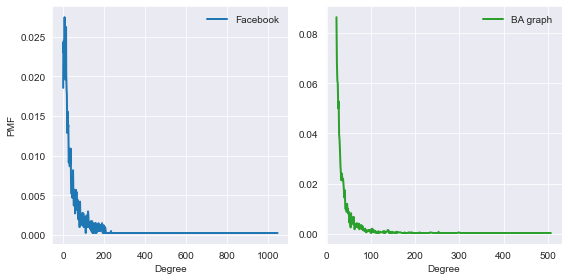

In [187]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
pmf_fb.plot(label='Facebook', color='C0')
decorate(xlabel='Degree', ylabel='PMF')

plt.subplot(1,2,2)
pmf_ba.plot(label='BA graph', color='C2')
decorate(xlabel='Degree')

But if we look at the PMF on a log-log scale, the BA model looks pretty good for values bigger than about 20.  And it seems to follow a power law.
但是如果我们在对数尺度上查看 PMF，BA 模型对于大于约 20 的值看起来相当不错。而且它似乎遵循幂律。

Saving figure to file figs/chap04-3


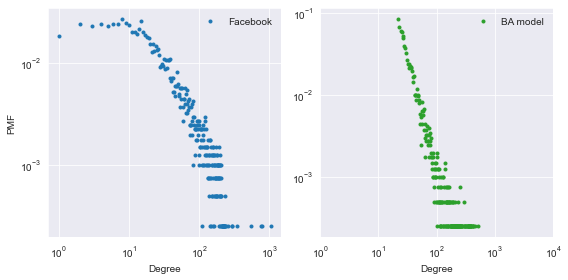

In [188]:
plt.figure(figsize=(8,4))
options = dict(ls='', marker='.')

plt.subplot(1,2,1)

pmf_fb.plot(label='Facebook', color='C0', **options)
decorate(xlabel='Degree', ylabel='PMF',
         xscale='log', yscale='log')

plt.subplot(1,2,2)

pmf_ba.plot(label='BA model', color='C2', **options)
decorate(xlabel='Degree',
         xlim=[1, 1e4],
         xscale='log', yscale='log')

savefig('figs/chap04-3')

The characteristic path length is even smaller in the model than in the data.
平均路径长度L是 2.5，这比实际的网络的L = 3.69更小。所以这很好，虽然可能有点好过头了

In [189]:
L, estimate_path_length(ba)

(3.731, 2.532)

But the clustering coefficient isn't even close.
群聚系数C为 0.037，并不接近数据集中的值 0.61。所以这是一个问题

In [190]:
C, average_clustering(ba)

(0.603, 0.048)

In the BA model, the degree distribution is better than in the WS model, but the clustering coefficient is too low.
BA模型的度数分布比WS模型好，但聚类系数太低。

## Cumulative distributions 累积分布函数(CDF)

Cumulative distributions are a better way to visualize distributions.  The following function shows what a cumulative probability is:
累积分布是可视化分布的更好方法。以下函数显示了累积概率：
更好的选择是累积分布函数 （CDF），它将x值映射为小于或等于x的值的比例。

给定一个 Pmf，计算累积概率的最简单方法是将x的概率加起来，包括x：

In [191]:
def cumulative_prob(pmf, x):
    """Computes the cumulative probability of `x`.
    
    Total probability of all values <= x.
    
    returns: float probability
    """
    ps = [pmf[value] for value in pmf.qs if value<=x]
    return np.sum(ps)

The total probability for all values up to and including 11 is 0.258, so the 25th percentile is about 11.
例如，给定数据集中的度的分布，pmf_pf，我们可以计算Facebook用户的好友数小于等于 11 的比例：

In [192]:
cumulative_prob(pmf_fb, 11)

0.2577370636296113

The median degree is about 25.
结果接近 0.5，这意味着好友数的中位数约为 25。

In [193]:
cumulative_prob(pmf_fb, 25)

0.5060658578856152

And the 75th percentile is about 57.  That is, about 75% of users have 57 friends or fewer.

In [194]:
cumulative_prob(pmf_fb, 57)

0.751671205743996

`empiricaldist` provides `Cdf`, which computes cumulative distribution functions.
因为 CDF 的噪音比 PMF 少，所以 CDF 更适合可视化。
一旦你习惯了 CDF 的解释，它们可以提供比 PMF 更清晰的分布图像。
Cdf，代表累积分布函数。我们可以用它来计算数据集中的度的 CDF。

In [195]:
from empiricaldist import Cdf

Here are the degree CDFs for the Facebook data, the WS model, and the BA model.
以下是 Facebook 数据、WS 模型和 BA 模型的度数 CDF。

In [196]:
cdf_fb = Cdf.from_seq(degrees(fb), name='Facebook')

In [197]:
cdf_ws = Cdf.from_seq(degrees(ws), name='WS model')

In [198]:
cdf_ba = Cdf.from_seq(degrees(ba), name='BA model')

If we plot them on a log-x scale, we get a sense of how well the models fit the central part of the distribution.

The WS model is hopeless.  The BA model is ok for values above the median, but not very good for smaller values.
如果我们将它们绘制在 log-x 尺度上，我们会了解模型与分布的中心部分的拟合程度。

WS 模型是没有希望的。 BA 模型适用于高于中位数的值，但不适用于较小的值。

Saving figure to file figs/chap04-4


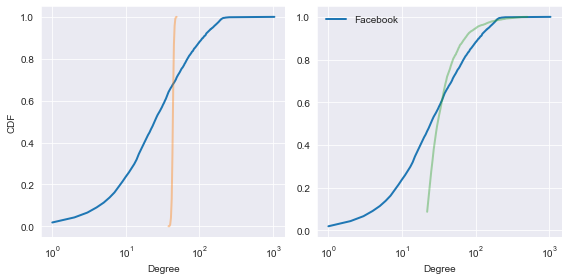

In [199]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
cdf_fb.plot(color='C0')
cdf_ws.plot(color='C1', alpha=0.4)
decorate(xlabel='Degree', xscale='log',
                 ylabel='CDF')

plt.subplot(1,2,2)
cdf_fb.plot(color='C0', label='Facebook')
cdf_ba.plot(color='C2', alpha=0.4)
decorate(xlabel='Degree', xscale='log')

savefig('figs/chap04-4')

Facebook 数据集中的度的 CDF，以及 WS 模型（左边）和 BA 模型（右边），在双对数刻度上。
在对数尺度上，我们看到 BA 模型非常适合分布的尾部。

Saving figure to file figs/chap04-5


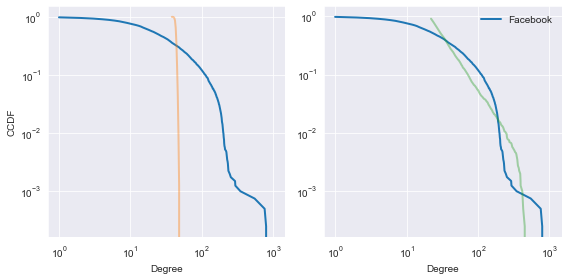

In [200]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
(1 - cdf_fb).plot(color='C0')
(1 - cdf_ws).plot(color='C1', alpha=0.4)
decorate(xlabel='Degree', xscale='log',
                 ylabel='CCDF', yscale='log')

plt.subplot(1,2,2)

(1 - cdf_fb).plot(color='C0', label='Facebook')
(1 - cdf_ba).plot(color='C2', alpha=0.4)
decorate(xlabel='Degree', xscale='log',
                 yscale='log')

savefig('figs/chap04-5')

But there is certainly room for a model that does a better job of fitting the whole distribution.
但肯定有一个模型可以更好地拟合整个分布。

## Exercises

**Exercise:** Data files from the Barabasi and Albert paper are available from
[this web page](https://web.archive.org/web/20150910025718/http://www3.nd.edu/~networks/resources.htm).

Their actor collaboration data is included in the repository for this book in a file named
`actor.dat.gz`.  The following function reads the file and builds the graph.
练习：来自 Barabasi 和 Albert 论文的数据文件可从该网页获得。
他们的参与者协作数据包含在本书存储库中名为 actor.dat.gz 的文件中。以下函数读取文件并构建图形。

In [201]:
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/data/actor.dat.gz')

In [202]:
import gzip

def read_actor_network(filename, n=None):
    """Reads graph data from a file.
    
    filename: string
    n: int, number of lines to read (default is all)
    """
    G = nx.Graph()
    with gzip.open(filename) as f:
        for i, line in enumerate(f):
            nodes = [int(x) for x in line.split()]
            G.add_edges_from(all_pairs(nodes))
            if n and i >= n:
                break
    return G

In [203]:
def all_pairs(nodes):
    """Generates all pairs of nodes."""
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

Compute the number of actors in the graph and the number of edges.

Check whether this graph has the small world properties, high clustering and low
path length.

Plot the PMF of degree on a log-log scale.  Does it seem to follow a power law?

Also plot the CDF of degree on a log-x scale, to 
see the general shape of the distribution, and on a log-log scale, to see whether 
the tail follows a power law.

Note: The actor network is not connected, so you might want to use
`nx.connected_components` to find connected subsets of the
nodes.
计算图中参与者的数量和边的数量。
检查此图是否具有小世界属性、高聚类和低路径长度。
在对数刻度上绘制度数的 PMF。它似乎遵循幂律吗？
还要在 log-x 尺度上绘制度数的 CDF，以查看分布的一般形状，并在 log-log 尺度上，查看尾部是否遵循幂律。
注意：参与者网络未连接，因此您可能需要使用 nx.connected_components 来查找节点的连接子集。

In [204]:
# WARNING: if you run this with larger values of `n`, you
# might run out of memory, and Jupyter does not handle that well.
# 可能会耗尽内存，而 Jupyter 不能很好地处理。
%time actors = read_actor_network('actor.dat.gz', n=10000)
len(actors)

CPU times: user 303 ms, sys: 14.3 ms, total: 317 ms
Wall time: 318 ms


17540

In [205]:
# Solution

# As expected, the average clustering is high

average_clustering(actors, trials=10000)

0.7308

In [206]:
# Solution

# And in the largest connected component, the average path length is low

for nodes in nx.connected_components(actors):
    if len(nodes) > 100:
        print(len(nodes), estimate_path_length(actors, nodes))

17270 3.498


In [207]:
# Solution

# Here are the mean and standard deviation of degree:

ds = degrees(actors)
np.mean(ds), np.std(ds)

(38.35541619156214, 61.53610074821354)

# Solution

# And the PMF of degree on a log-log scale
＃ 解决方案

# 和度数的 PMF 在对数尺度上

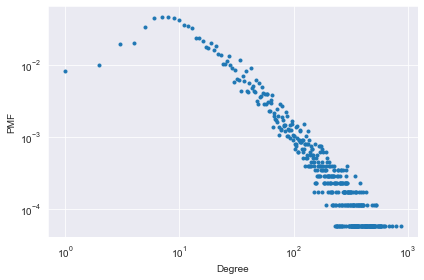

In [208]:

pmf = Pmf.from_seq(ds, name='actors')
pmf.plot(**options)
decorate(xlabel='Degree', ylabel='PMF',
         xscale='log', yscale='log')

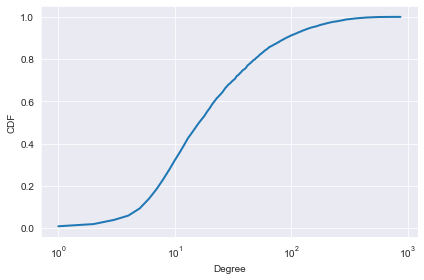

In [209]:
# Solution

# Here's the CDF on a log scale

cdf = Cdf.from_seq(ds, name='actors')
cdf.plot()
decorate(xlabel='Degree', ylabel='CDF', xscale='log')

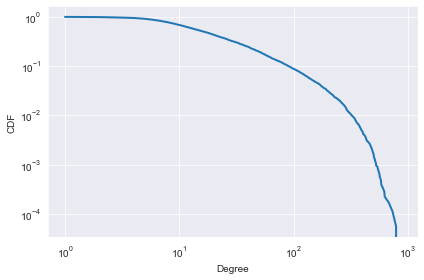

In [210]:
# Solution

# and the CDF on a log-log scale

(1-cdf).plot()
decorate(xlabel='Degree', ylabel='CDF',
                 xscale='log', yscale='log')

In [211]:
# Solution

# The PMF on a log-log scale suggests a power law.

# The CDF on a log-x scale looks like a lognormal distribution, possibly
# skewed to the right.

# The CDF on a log-log scale does not have the straight line behavior
# we expect from a power law, but it is consistent with a heavy-tailed
# distribution.

# 对数刻度上的 PMF 表明了幂律。

# log-x 尺度上的 CDF 看起来像对数正态分布，可能
# 向右倾斜。

# 对数刻度上的 CDF 不具有直线行为
# 我们期望幂律，但它与重尾一致


**Exercise:** NetworkX provides a function called `powerlaw_cluster_graph` that implements the "Holme and Kim algorithm for growing graphs with powerlaw degree distribution and approximate average clustering".  Read the documentation of this function and see if you can use it to generate a graph that has the same number of nodes as the Facebook network, the same average degree, and the same clustering coefficient.  How does the degree distribution in the model compare to the actual distribution?
**练习：** NetworkX 提供了一个名为 `powerlaw_cluster_graph` 的函数，它实现了“Holme and Kim 算法，用于增长具有幂律度分布和近似平均聚类的图”。阅读这个函数的文档，看看你是否可以使用它来生成一个与 Facebook 网络具有相同节点数、相同平均度和相同聚类系数的图。模型中的度数分布与实际分布相比如何？

In [212]:
# Again, here are the parameters of the Facebook data

n = len(fb)
m = len(fb.edges())
k = int(round(m / n))
n, m, k

(4039, 88234, 22)

In [213]:
# Solution

# Now we can make an HK graph with these parameters,
# and with the target clustering as high as possible.

hk = nx.powerlaw_cluster_graph(n, k, 1.0, seed=15)
len(hk), len(hk.edges())

(4039, 88363)

In [214]:
# Solution

# The average clustering is much higher than in the BA
# model, but still not as high as in the data.

C, average_clustering(hk)

(0.603, 0.281)

In [215]:
# Solution

# The average path length is even lower than in the data.

L, estimate_path_length(hk)

(3.731, 2.743)

In [216]:
# Solution

# The mean degree is about right.

np.mean(degrees(fb)), np.mean(degrees(hk))

(43.69101262688784, 43.75488982421391)

In [217]:
# Solution

# The standard deviation of degree is a little low

np.std(degrees(fb)), np.std(degrees(hk))

(52.41411556737521, 43.106377456263075)

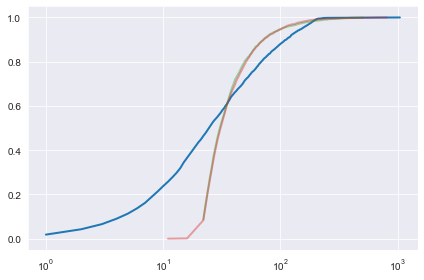

In [218]:
# Solution

# The degree distribution is almost identical to the BA model

cdf_hk = Cdf.from_seq(degrees(hk), name='HK model')
cdf_fb.plot(color='C0')
cdf_ba.plot(color='C2', alpha=0.4)
cdf_hk.plot(color='C3', alpha=0.4)
decorate(xscale='log')

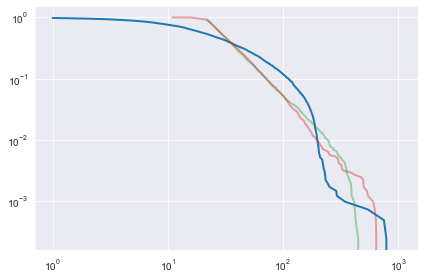

In [219]:
# Solution

# On a log-log scale, both HK and BA are reasonable
# models for the tail behavior.

(1-cdf_fb).plot()
(1-cdf_ba).plot(color='C2', alpha=0.4)
(1-cdf_hk).plot(color='C3', alpha=0.4)
decorate(xscale='log', yscale='log', loc='upper right')
